In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mental-health:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3559763%2F6200306%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240516%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240516T100003Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D48700e90064e151bb179a788fa4024798eb4db1fb2aa0051bcb5369714ecd9235106eec34d63aa8debb6402764625bc8c31410cc9b8f31ee94d56182df2281c24cecde090906794632c7f58ea979eda4de84549def7bc50561460e9b40ed34c32f250e70e7b56f9e68cd0bb29594eb4d96b7ea6aeb4687fb3c3f1a6fb243aa53572f23c8c3e723967fd0d65a2812bd6e923d083f4352d6927d921775f28b5c468006013620b2f031bd51820150fbb93d7740d5c0cc2c0bf7eaf1d74d3f4c44437f0ffd8ce24e1bb194939dc89fb6a4138398032e30240917dcbf7aa4d98874eae24f934d94f89f336f0d1548606e48bf56f011c5347beb8410bd5de48686856f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 346265 bytes downloaded
Downloaded and uncompressed: mental-health
Data source import complete.


In [ ]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Data1 = pd.read_csv("/kaggle/input/mental-health/1- mental-illnesses-prevalence.csv")
Data2 = pd.read_csv("/kaggle/input/mental-health/4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")
Data3 = pd.read_csv("/kaggle/input/mental-health/6- depressive-symptoms-across-us-population.csv")
Data4 = pd.read_csv("/kaggle/input/mental-health/7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv")

In [ ]:
df1 = pd.DataFrame(Data1)
df2 = pd.DataFrame(Data2)
df3 = pd.DataFrame(Data3)
df4 = pd.DataFrame(Data4)

In [ ]:
def describe(df):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []


    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })

    return output

In [ ]:
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df1 : Mental illness dataframe"' + color.END)
print(describe(df1))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df2 : Adult population, mental illnesses"' + color.END)
print(describe(df2))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df3 : Depressive"' + color.END)
print(describe(df3))
print("\n")
print(color.BOLD + color.BLUE + color.UNDERLINE +
      '"The describe table of df4 : Number of countries"' + color.END)
print(describe(df4))

"The describe table of df1 : Mental illness dataframe"
                                            variable    dtype  count  unique  \
0                                             Entity   object   6420     214   
1                                               Code   object   6420     206   
2                                               Year    int64   6420      30   
3  Schizophrenia disorders (share of population) ...  float64   6420    6406   
4  Depressive disorders (share of population) - S...  float64   6420    6416   
5  Anxiety disorders (share of population) - Sex:...  float64   6420    6417   
6  Bipolar disorders (share of population) - Sex:...  float64   6420    6385   
7  Eating disorders (share of population) - Sex: ...  float64   6420    6417   

   missing value  
0              0  
1            270  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  


"The describe table of df2 : Adult population, ment

In [ ]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']

In [ ]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [ ]:
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


<Axes: xlabel='Year', ylabel='Anxiety disorders'>

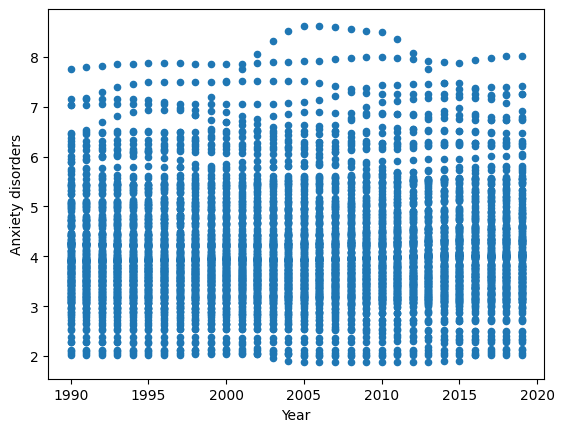

In [ ]:
# prompt: Using dataframe df1: Anxiety vs year

df1.plot.scatter(x='Year', y='Anxiety disorders')


<Axes: xlabel='Year', ylabel='Schizophrenia disorders'>

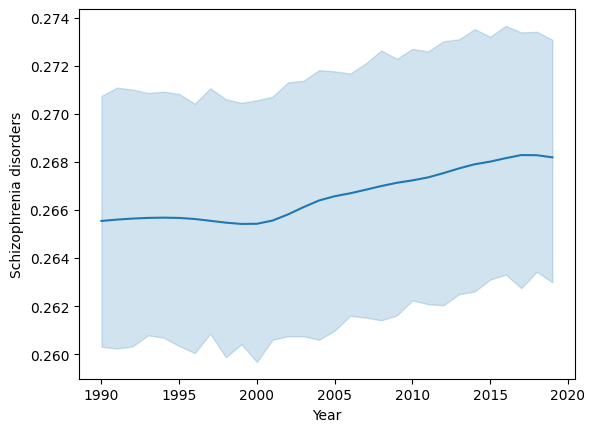

In [ ]:
# @title Schizophrenia disorders prevalence over time

sns.lineplot(data=df1, x="Year", y="Schizophrenia disorders")

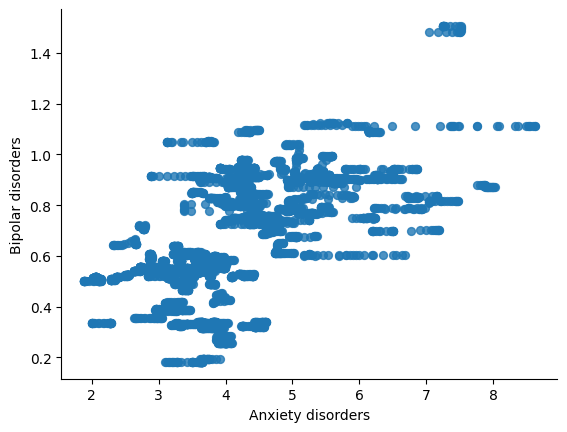

In [ ]:
from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='Anxiety disorders', y='Bipolar disorders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

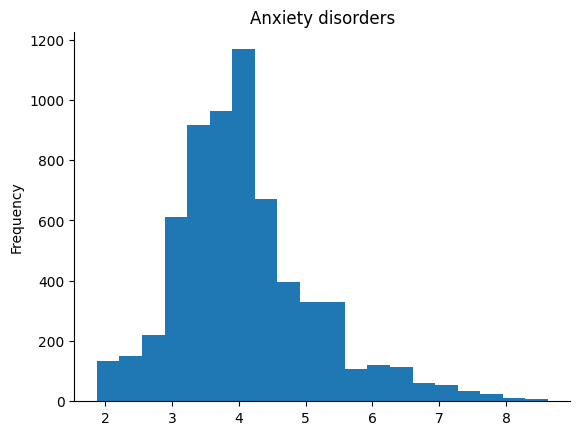

In [ ]:
from matplotlib import pyplot as plt
df1['Anxiety disorders'].plot(kind='hist', bins=20, title='Anxiety disorders')
plt.gca().spines[['top', 'right',]].set_visible(False)

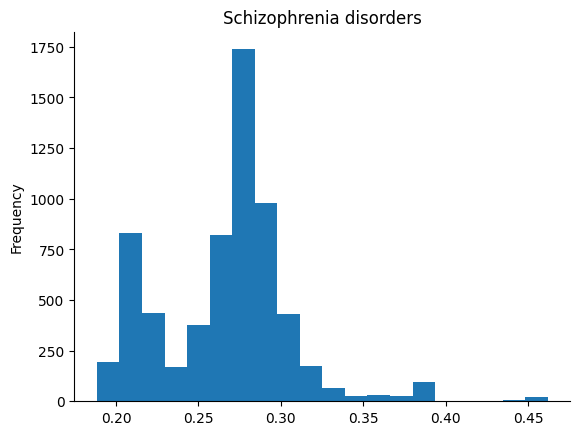

In [ ]:
from matplotlib import pyplot as plt
df1['Schizophrenia disorders'].plot(kind='hist', bins=20, title='Schizophrenia disorders')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

In [ ]:
df1_variables

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


In [ ]:
Corrmat = df1_variables.corr()

<Axes: >

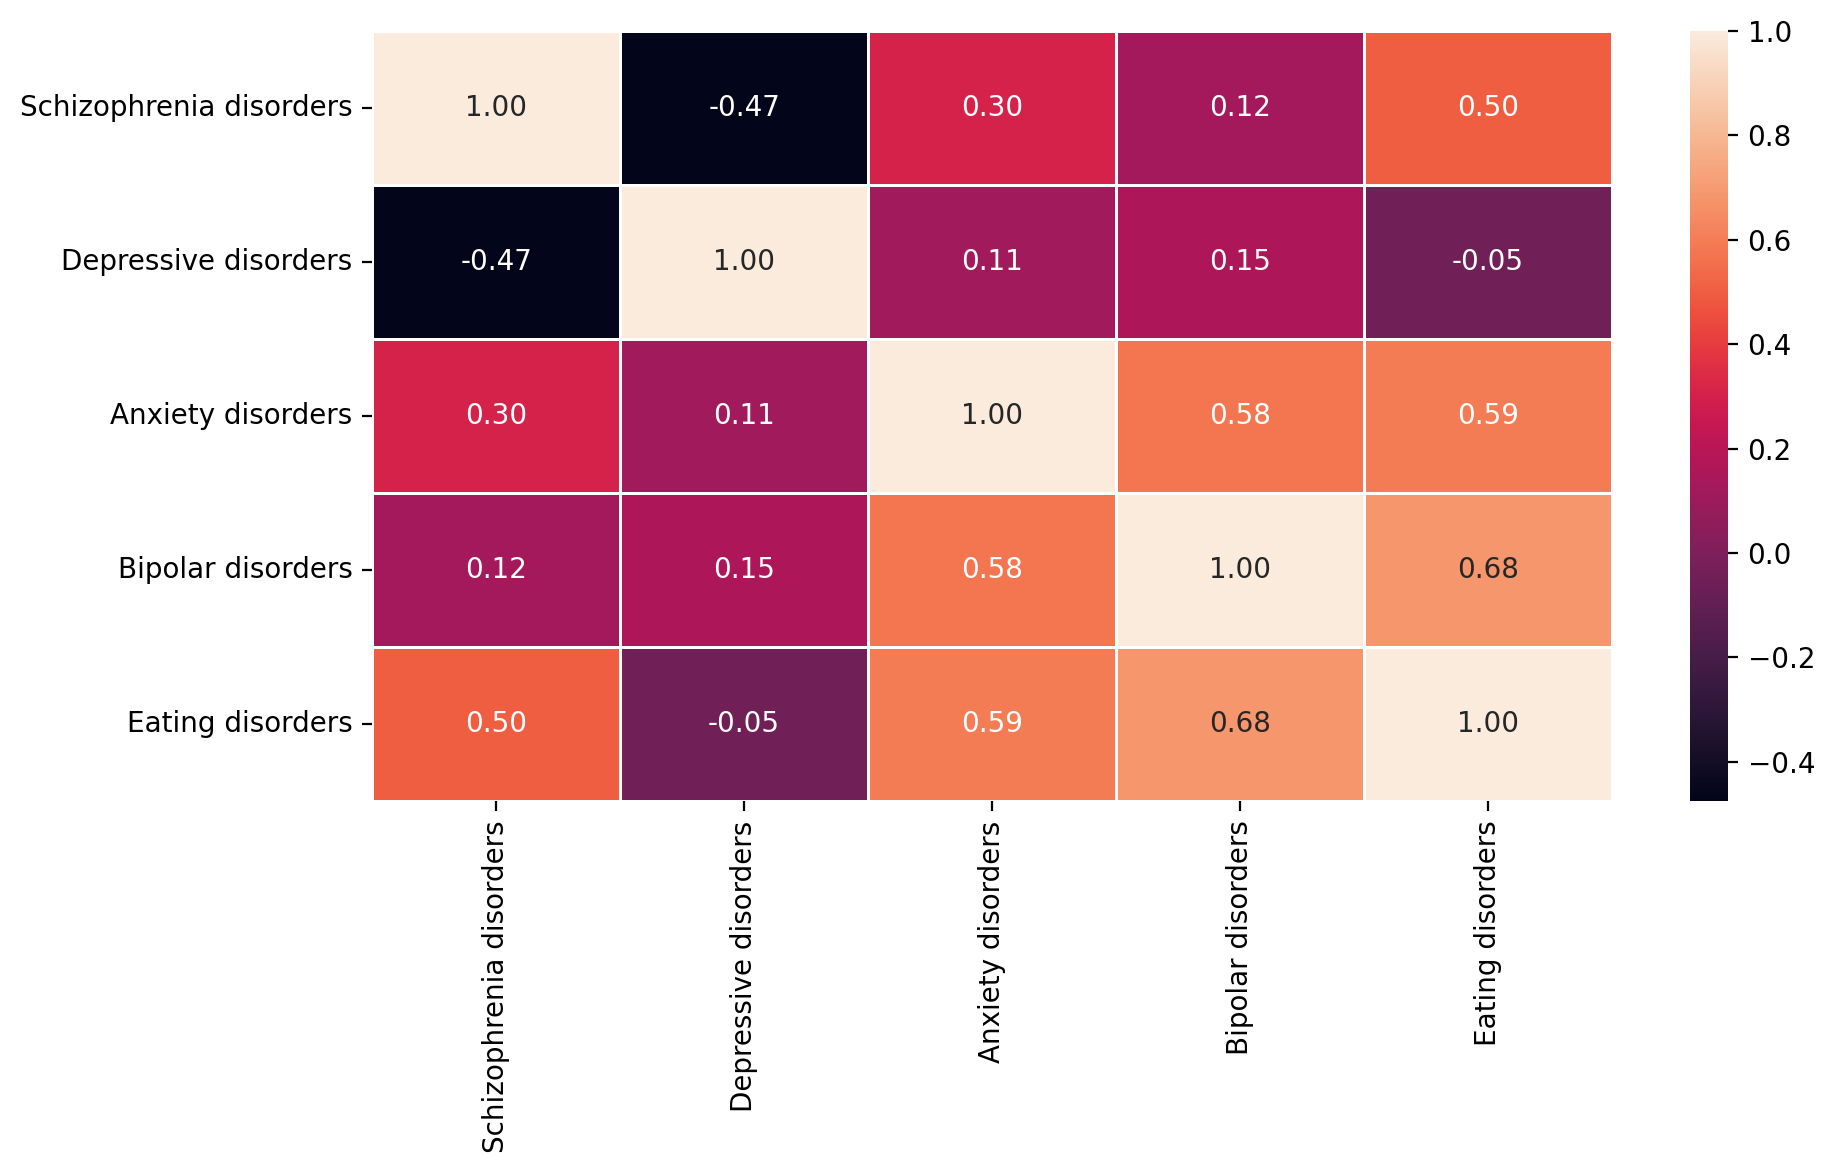

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corrmat, annot=True,fmt=".2f", linewidth=.5)

In [ ]:
df1_column_names = list(df1.columns.values)
df1_column_names

['Entity',
 'Code',
 'Year',
 'Schizophrenia disorders',
 'Depressive disorders',
 'Anxiety disorders',
 'Bipolar disorders',
 'Eating disorders']

In [ ]:
df1 = df1.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [ ]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

In [ ]:
df1

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [ ]:
df1_variables = df1[["Schizophrenia disorders","Depressive disorders","Anxiety disorders","Bipolar disorders",
                       "Eating disorders"]]

In [ ]:
df1_variables

,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...
6415,0.201042,3.407624,3.184012,0.538596,0.095652
6416,0.201319,3.410755,3.187148,0.538593,0.096662
6417,0.201639,3.411965,3.188418,0.538589,0.097330
6418,0.201976,3.406929,3.172111,0.538585,0.097909


In [ ]:
features = ['Schizophrenia disorders', 'Depressive disorders','Anxiety disorders','Bipolar disorders']
X_model = df1[features]
y_model = df1["Eating disorders"]

In [ ]:
scaler = preprocessing.MinMaxScaler()
X_model_norm = scaler.fit_transform(X_model)

In [ ]:
X_model_norm

array([[0.12714204, 0.56728135, 0.42008448, 0.39345779],
       [0.12439376, 0.56616628, 0.41842183, 0.39273757],
       [0.1218262 , 0.56486898, 0.41570011, 0.39177399],
       ...,
       [0.04832425, 0.30858363, 0.19399437, 0.26936249],
       [0.0495569 , 0.30776117, 0.19157658, 0.26935944],
       [0.05140367, 0.30589079, 0.1863733 , 0.26935592]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_model_norm, y_model, test_size=20, random_state=42)

In [ ]:
print("Shape of x_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (6400, 4)
Shape of y_train :  (6400,)
Shape of x_test :  (20, 4)
Shape of y_test :  (20,)


In [ ]:
Model= LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=Model.predict(X_test)

In [ ]:
print("Mean Absolute Error of Model is: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error of Model is: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared of Model is: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score of Model is: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error of Model is:  0.08003250281357932
Mean Squared Error of Model is:  0.02178632883846133
Root Mean Squared of Model is:  0.14760192694697902
R2 Score of Model is:  0.6289967829652676


In [ ]:
k_fold = KFold(10)
print (cross_val_score(Model, X_model_norm, y_model.ravel(), cv=k_fold, n_jobs=1))

[0.67019159 0.30224538 0.34774549 0.6311535  0.62898747 0.59061848
 0.66269011 0.57389516 0.64517085 0.84017723]


In [ ]:
def check(Dimension, testsize):
    r2 = 0.6289
    for column in X_model:
        New_Col_name = column + str(Dimension)
        New_Col_value = X_model[column]**Dimension
        X_model.insert(0, New_Col_name, New_Col_value)
        X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,test_size=testsize,random_state=0)
        New_model = LinearRegression()
        New_model.fit(X_train, y_train)
        y_pred = New_model.predict (X_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            X_model.drop([New_Col_name], axis=1, inplace=True)
        else:
            r2 = r2_new

    print("R2 score is: ", r2)
check(2,0.2)

R2 score is:  0.6554298773488345


In [ ]:
X_model

,Bipolar disorders2,Anxiety disorders2,Depressive disorders2,Schizophrenia disorders2,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders
0,0.494242,22.215329,24.961195,0.049821,0.223206,4.996118,4.713314,0.703023
1,0.492901,22.109744,24.893013,0.049486,0.222454,4.989290,4.702100,0.702069
2,0.491109,21.937448,24.813805,0.049174,0.221751,4.981346,4.683743,0.700792
3,0.490122,21.842057,24.770114,0.048835,0.220987,4.976958,4.673549,0.700087
4,0.489857,21.816466,24.778314,0.048481,0.220183,4.977782,4.670810,0.699898
...,...,...,...,...,...,...,...,...
6415,0.290085,10.137934,11.611901,0.040418,0.201042,3.407624,3.184012,0.538596
6416,0.290082,10.157910,11.633250,0.040529,0.201319,3.410755,3.187148,0.538593
6417,0.290078,10.166010,11.641508,0.040658,0.201639,3.411965,3.188418,0.538589
6418,0.290074,10.062288,11.607165,0.040794,0.201976,3.406929,3.172111,0.538585


In [ ]:
Bipolar_Anx = X_model["Bipolar disorders"]*X_model["Anxiety disorders"]
Bipolar_Anx2 = X_model["Bipolar disorders2"]*X_model["Anxiety disorders2"]
Dep_Schi = X_model["Depressive disorders"]* X_model["Schizophrenia disorders"]
Dep_Schi2 = X_model["Depressive disorders2"]* X_model["Schizophrenia disorders2"]

In [ ]:
X_model.insert(0, "Bipolar_Anx", Bipolar_Anx)
X_model.insert(0, "Bipolar_Anx2", Bipolar_Anx2)
X_model.insert(0, "Dep_Schi", Dep_Schi)
X_model.insert(0, "Dep_Schi2", Dep_Schi2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model,test_size=0.2,random_state=0)
Model = LinearRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
r2

0.6779169482589392

**OUTPUT**

In [ ]:
a2 = X_test["Anxiety disorders"]
b2 = y_test
c2 = X_test["Anxiety disorders"]
d2 = y_pred

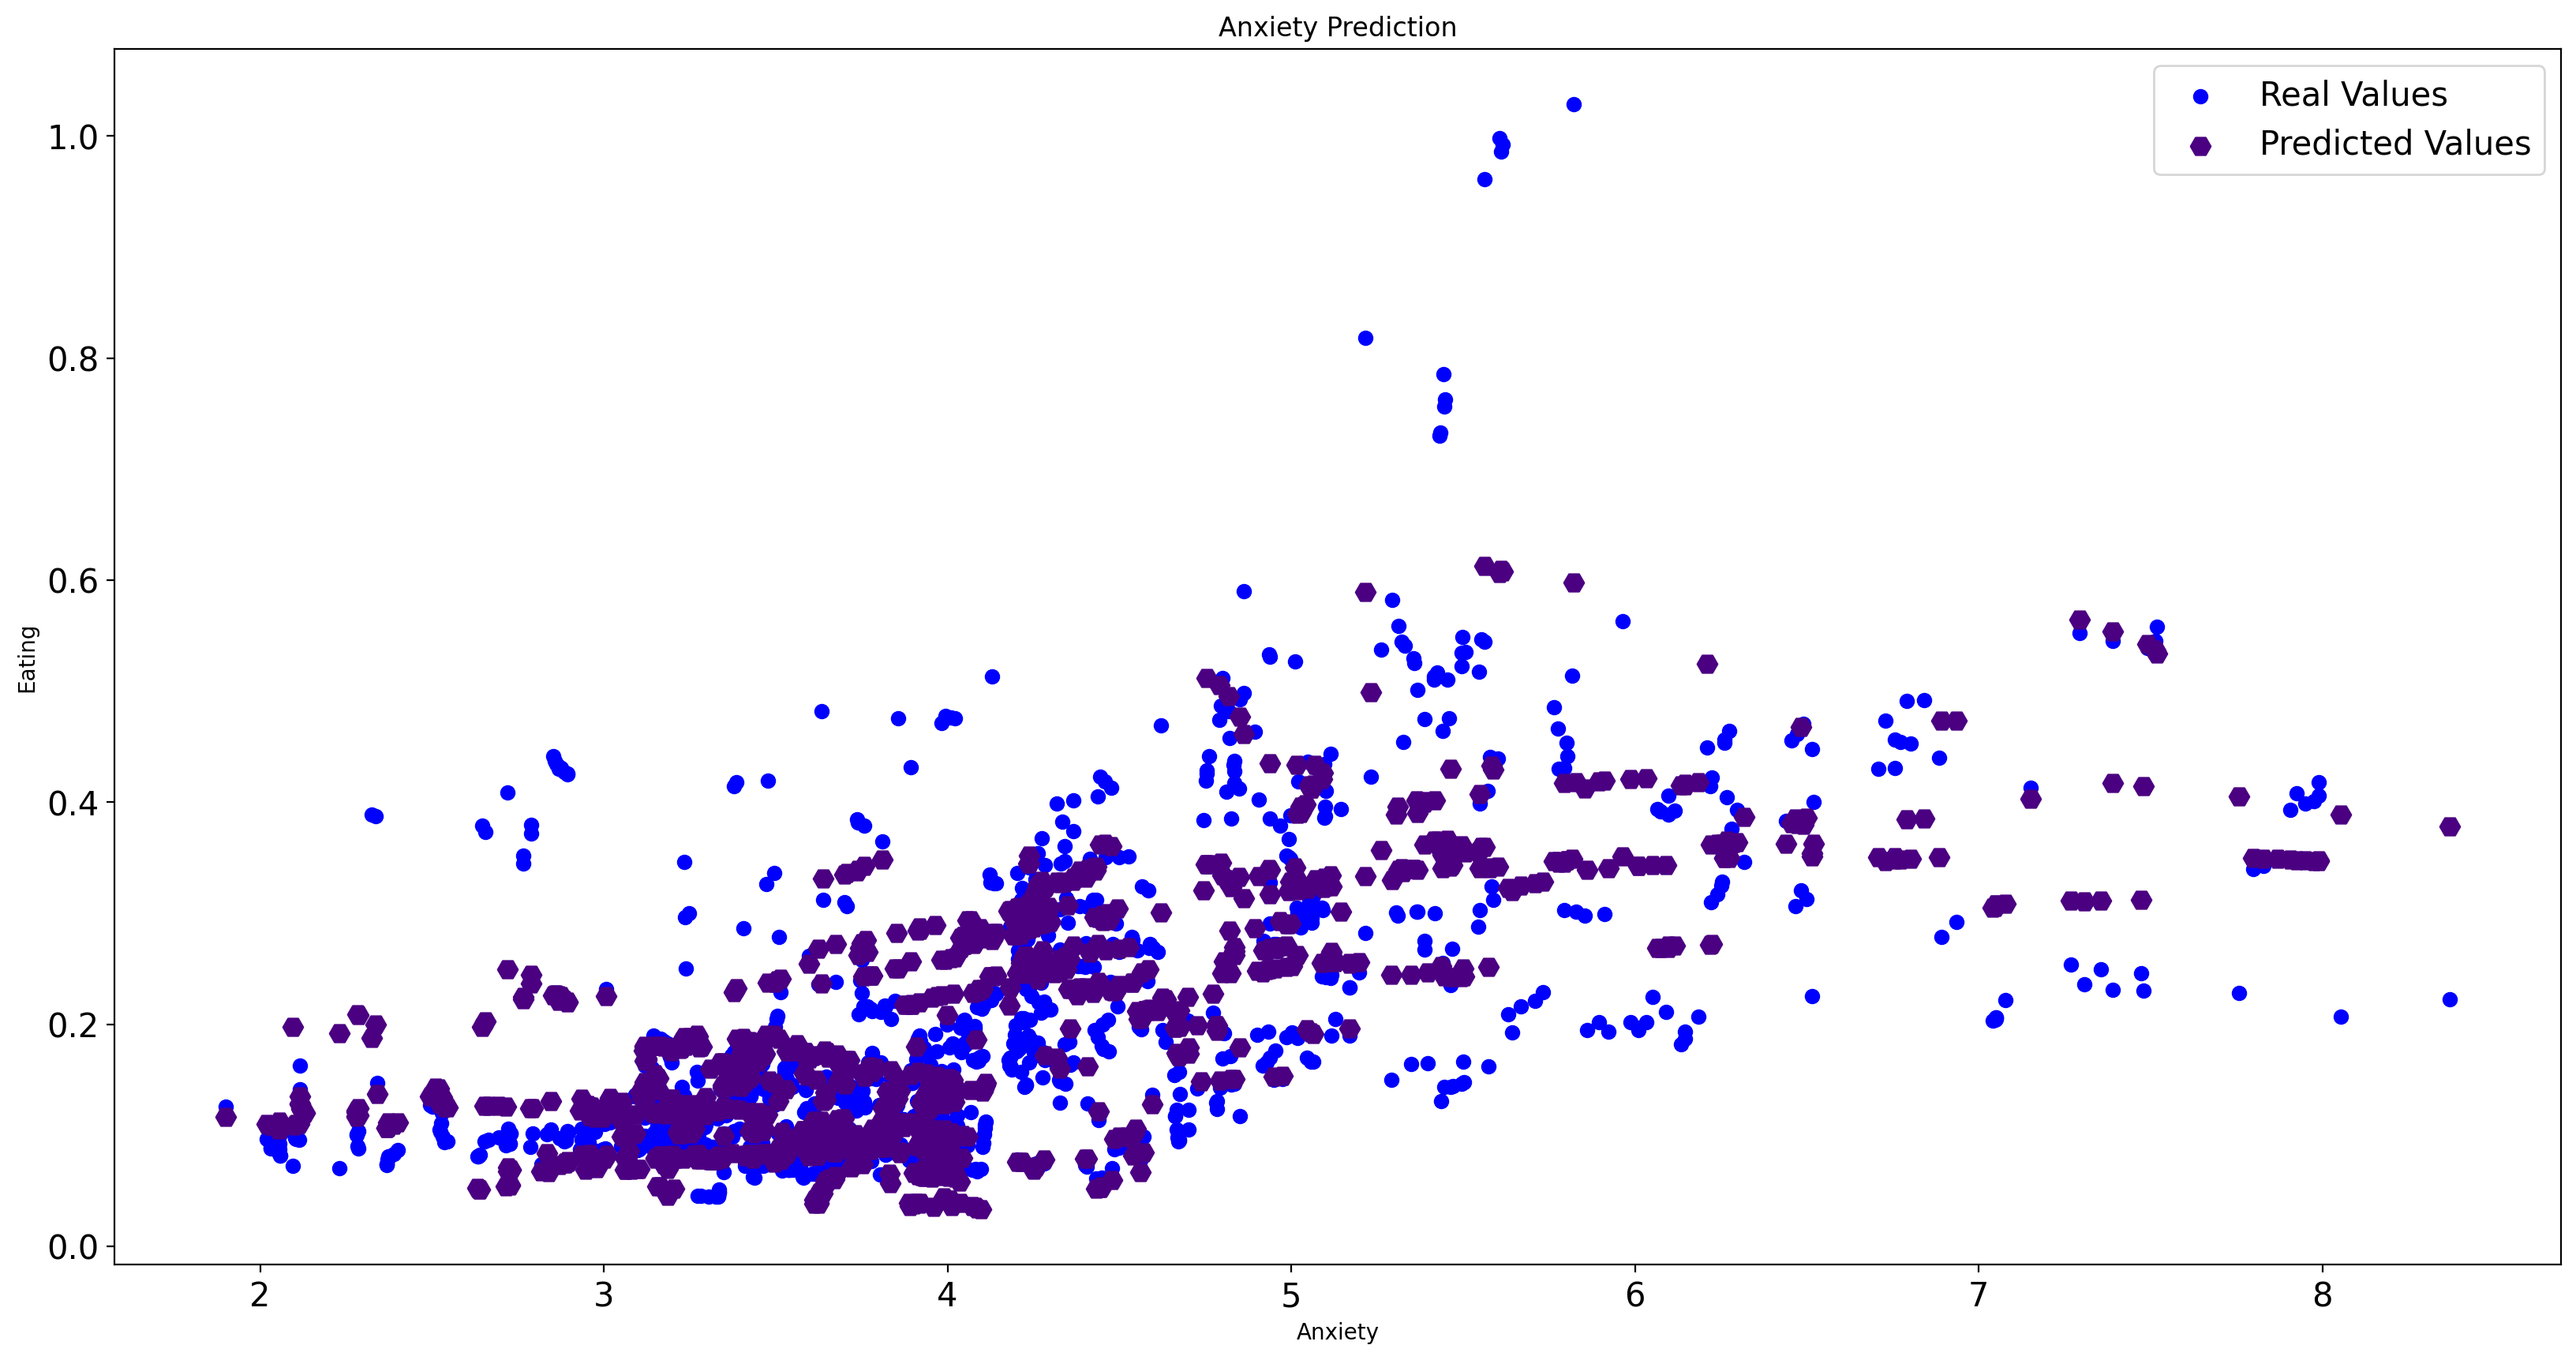

In [ ]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Anxiety Prediction")
plt.xlabel("Anxiety")
plt.ylabel("Eating")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a2,b2, color = 'blue', label = "Real Values")
plt.scatter(c2,d2, color = 'indigo', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()

In [ ]:
a3 = X_test["Depressive disorders"]
b3 = y_test
c3 = X_test["Depressive disorders"]
d3 = y_pred

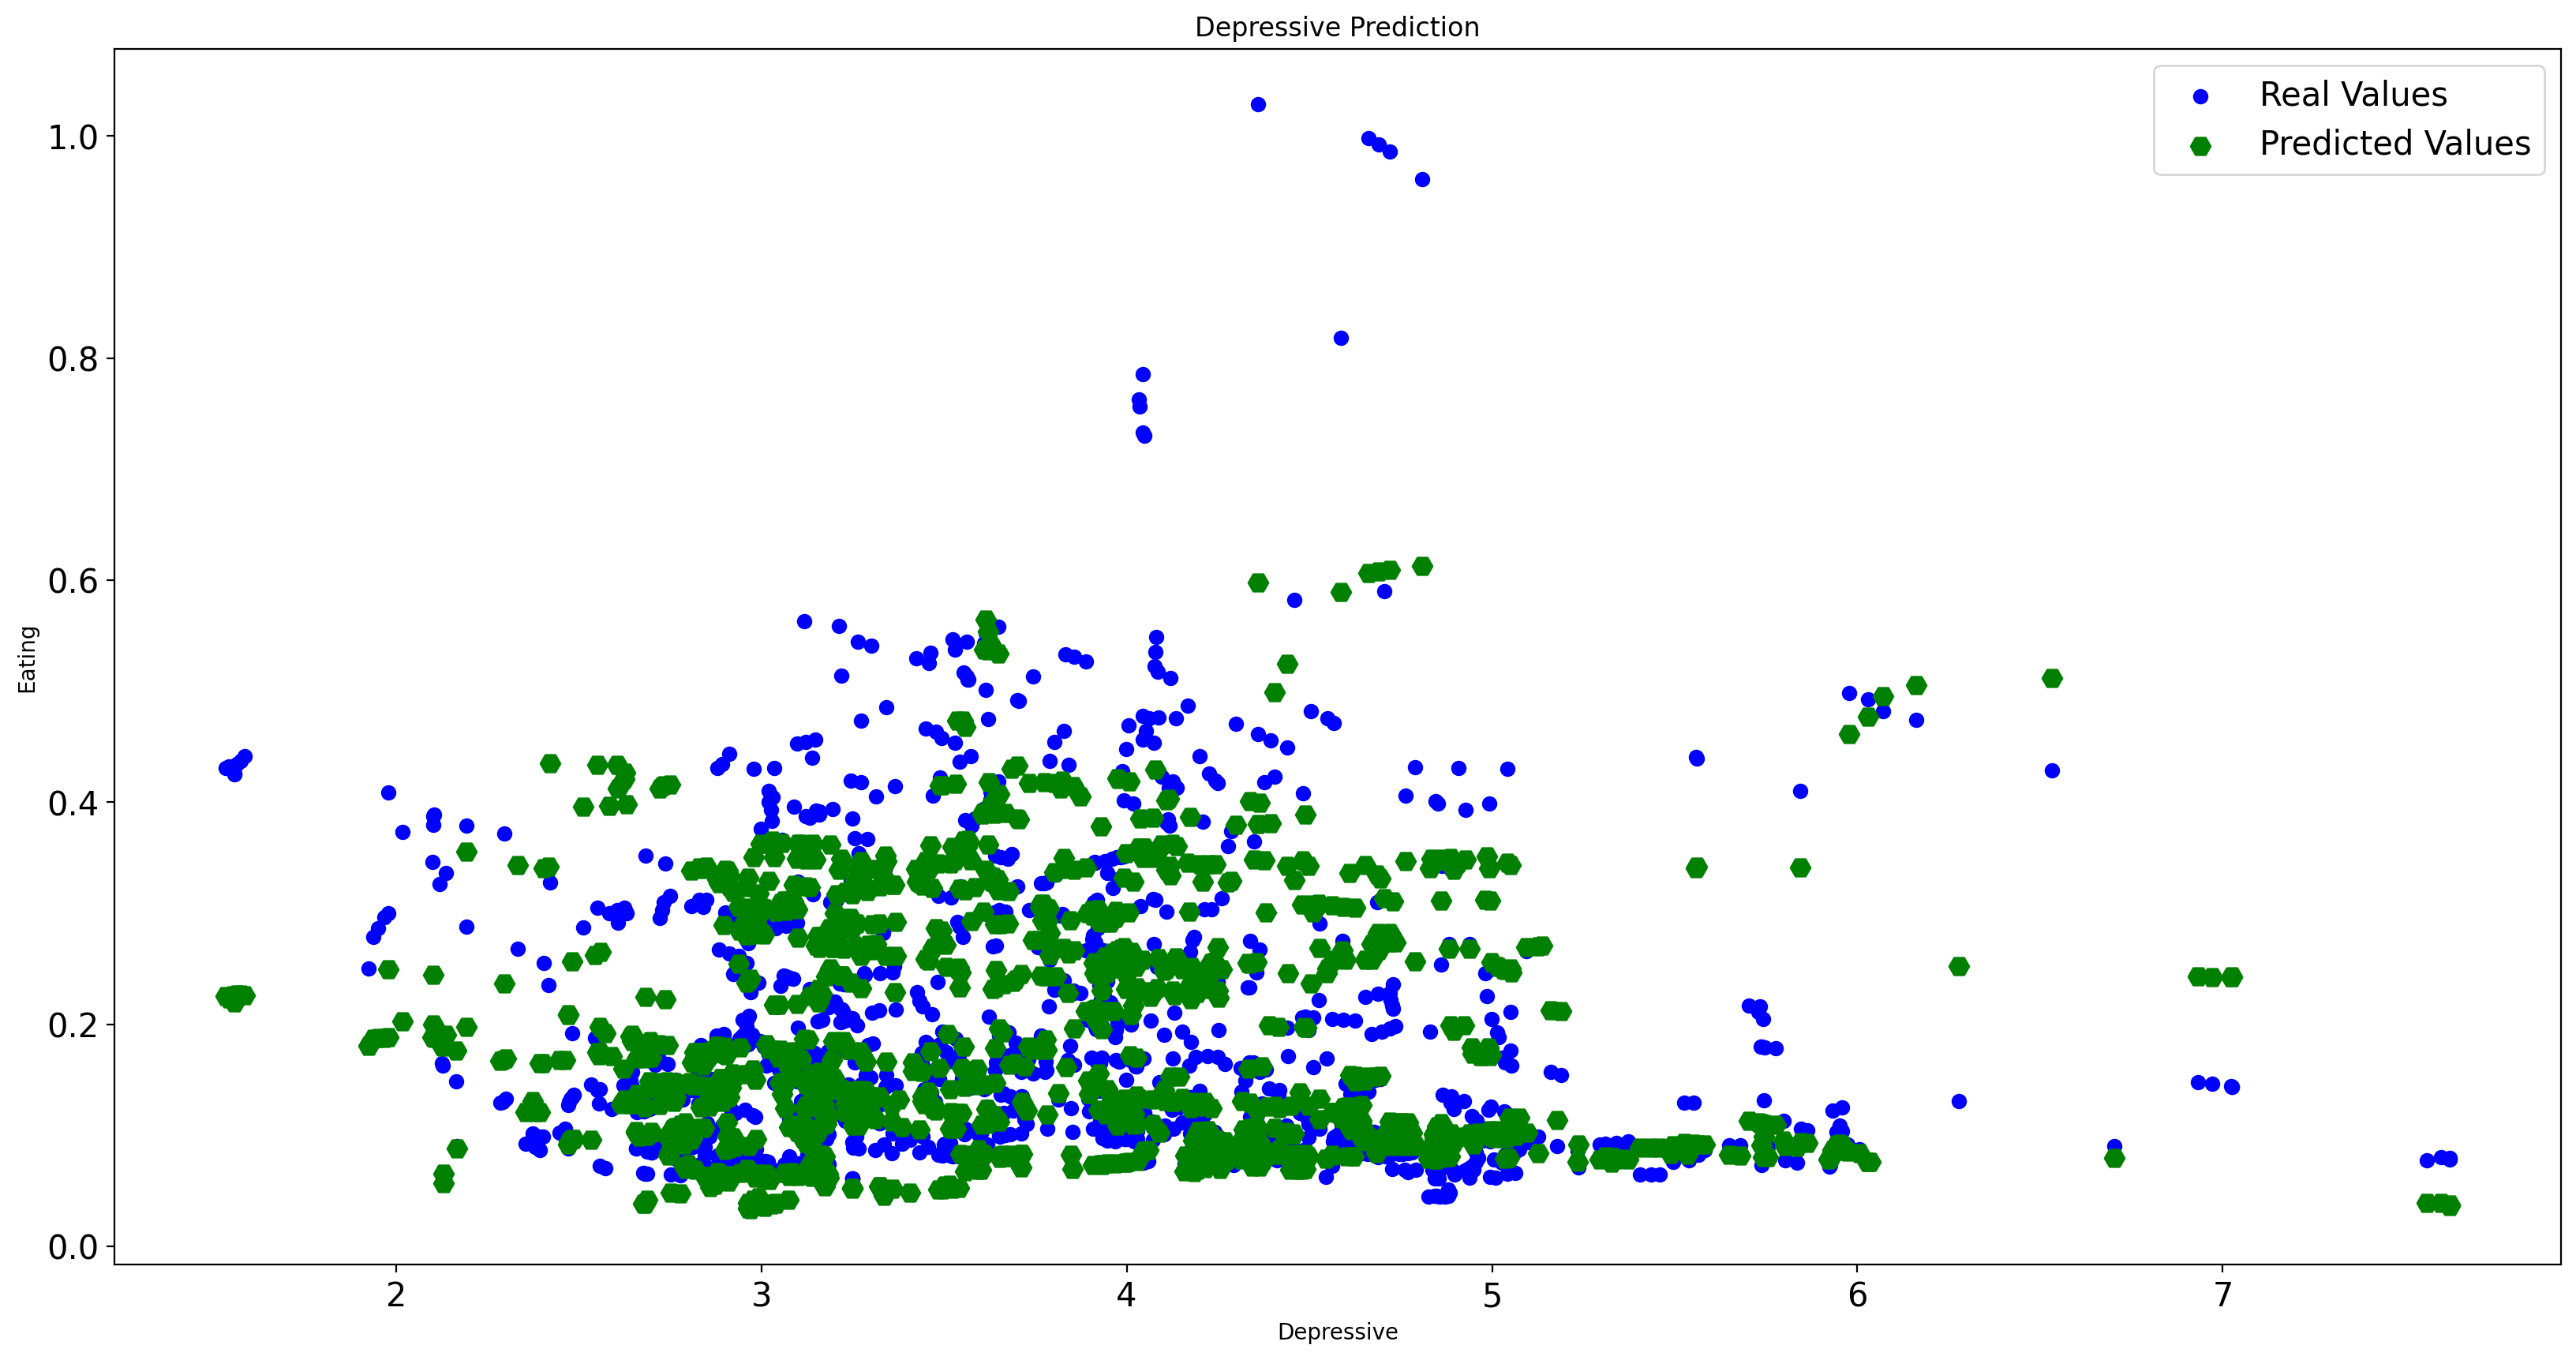

In [ ]:
plt.figure(figsize= (20,10), dpi=200)
plt.title("Depressive Prediction")
plt.xlabel("Depressive")
plt.ylabel("Eating")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(a3,b3, color = 'blue', label = "Real Values")
plt.scatter(c3,d3, color = 'green', label = "Predicted Values", marker="H", s=80)
plt.legend(fontsize=15)
plt.show()